In [1]:
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(2017)
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout, Input
from keras.models import Model
from keras.utils import to_categorical

2023-12-15 09:30:32.270423: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-15 09:30:32.401259: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-15 09:30:32.402652: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-15 09:30:33.144126: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
nb_classes = 10 # class size
input_unit_size = 28*28 # flatten 28*28 images to a 784 vector for each image

In [6]:
X_train = X_train.reshape(X_train.shape[0], input_unit_size)
X_test  = X_test.reshape(X_test.shape[0], input_unit_size)
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_train /= 255
X_test /= 255

In [9]:
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

In [10]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 784)
60000 train samples
10000 test samples


In [11]:
# create model
model = Sequential()
model = Sequential()
model.add(Dense(input_unit_size, input_dim=input_unit_size, kernel_initializer='normal', activation='relu'))
model.add(Dense(nb_classes, kernel_initializer='normal', activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-12-15 09:30:54.831782: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-15 09:30:54.929462: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


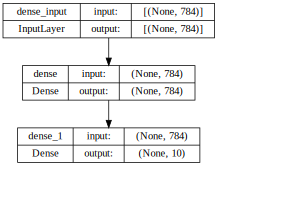

In [12]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [13]:
# model training
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=500, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/5
120/120 - 1s - loss: 0.3846 - accuracy: 0.8916 - val_loss: 0.1872 - val_accuracy: 0.9473 - 1s/epoch - 8ms/step
Epoch 2/5
120/120 - 1s - loss: 0.1565 - accuracy: 0.9560 - val_loss: 0.1273 - val_accuracy: 0.9620 - 607ms/epoch - 5ms/step
Epoch 3/5
120/120 - 1s - loss: 0.1056 - accuracy: 0.9709 - val_loss: 0.0988 - val_accuracy: 0.9709 - 613ms/epoch - 5ms/step
Epoch 4/5
120/120 - 1s - loss: 0.0785 - accuracy: 0.9785 - val_loss: 0.0869 - val_accuracy: 0.9738 - 605ms/epoch - 5ms/step
Epoch 5/5
120/120 - 1s - loss: 0.0604 - accuracy: 0.9831 - val_loss: 0.0751 - val_accuracy: 0.9780 - 611ms/epoch - 5ms/step
Error: 2.20%


# TensorFlow's low-level API

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
# Set random seed for reproducibility
np.random.seed(2017)
tf.random.set_seed(2017)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf = tf.compat.v1
tf.disable_v2_behavior()

In [15]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Parameters
nb_classes = 10
input_unit_size = 28 * 28
learning_rate = 0.001
batch_size = 500
training_epochs = 5

In [16]:
# Data Preprocessing
X_train = X_train.reshape(-1, input_unit_size).astype('float32') / 255
X_test = X_test.reshape(-1, input_unit_size).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

In [17]:
# TensorFlow Graph Input
x = tf.placeholder(tf.float32, [None, input_unit_size])
y = tf.placeholder(tf.float32, [None, nb_classes])

In [18]:
# Model weights and biases
W1 = tf.Variable(tf.random.normal([input_unit_size, input_unit_size]))
b1 = tf.Variable(tf.random.normal([input_unit_size]))
W2 = tf.Variable(tf.random.normal([input_unit_size, nb_classes]))
b2 = tf.Variable(tf.random.normal([nb_classes]))

In [19]:
# Forward pass
def model(x):
    hidden_layer = tf.add(tf.matmul(x, W1), b1)
    hidden_layer = tf.nn.relu(hidden_layer)
    output_layer = tf.add(tf.matmul(hidden_layer, W2), b2)
    return output_layer

In [20]:
def loss_fn(output_layer, labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=labels))

In [21]:
# Optimizer
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

In [22]:
# Training operation
train_op = optimizer.minimize(loss_fn(model(x), y))

In [23]:
# Initialize the variables
init = tf.compat.v1.global_variables_initializer()

In [24]:
# Start session
with tf.compat.v1.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(X_train.shape[0] / batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = X_train[i*batch_size:(i+1)*batch_size], y_train[i*batch_size:(i+1)*batch_size]
            _, c = sess.run([
                train_op,
                loss_fn(model(x),y)
            ], feed_dict={x:batch_x, y:batch_y})
            avg_cost += c/total_batch
        print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
    print("Optimization Finished!")
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(model(x), 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: X_test, y: y_test}))

2023-12-15 09:30:59.405922: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled


Epoch: 0001 cost=67.580797474
Epoch: 0002 cost=15.501625081
Epoch: 0003 cost=10.380255838
Epoch: 0004 cost=7.897742842
Epoch: 0005 cost=6.324349078
Optimization Finished!
Accuracy: 0.8988


In [25]:
import pandas as pd

In [26]:
# load pima indians dataset
dataset = pd.read_csv('Data/Diabetes.csv')
dataset.head(5)

,preg_count,glucose_concentration,blood_pressure,skin_thickness,serum_insulin,bmi,pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
X = dataset.iloc[:, 0:8].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [29]:
y = dataset['class'].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [30]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [31]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

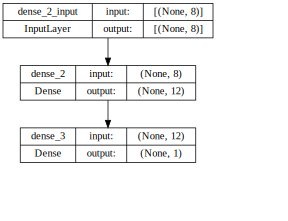

In [32]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [33]:
# Fit the model
model.fit(X, y, epochs=5, batch_size=10)

Train on 768 samples


2023-12-15 09:37:21.126419: W tensorflow/c/c_api.cc:304] Operation '{name:'training/Adam/dense_3/kernel/m/Assign' id:23862 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_3/kernel/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_3/kernel/m, training/Adam/dense_3/kernel/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch 1/5
768/768 [==============================] - 0s 291us/sample - loss: 0.6700 - acc: 0.6471
Epoch 2/5
768/768 [==============================] - 0s 43us/sample - loss: 0.6530 - acc: 0.6536
Epoch 3/5
768/768 [==============================] - 0s 44us/sample - loss: 0.6393 - acc: 0.6562
Epoch 4/5
768/768 [==============================] - 0s 46us/sample - loss: 0.6295 - acc: 0.6589
Epoch 5/5
768/768 [==============================] - 0s 45us/sample - loss: 0.6206 - acc: 0.6719


In [34]:
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-12-15 09:37:29.792827: W tensorflow/c/c_api.cc:304] Operation '{name:'loss/mul' id:23718 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_3_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


acc: 67.45%
